In [1]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plv_hist = np.genfromtxt ('plv_hist.csv', delimiter=",")
plv_pi = np.genfromtxt ('plv_pi.csv', delimiter=",")
volc_sigl = -1*np.genfromtxt ('sigl.txt', delimiter=",")
volc_source_sigl = np.genfromtxt ('volc_source_850_1849.csv', delimiter=",")

# The PI control experiment data is from 850-1849 and the historical last millenium 
# run is from 850-1850, hence there is one year extra in the historical run. So we need to 
# take only upto 1849 to have complete 1000 years. Further the phase locking values are 
# calculated as from 3 year moving windows. So, the first value represents July 1851 and the 
# last value represents June 1848, Hence there are 11964 months. From the yearly volcanic 
# data a monthly dataset is created in which the first six months have the values of 
# volcanic year 1851 and the last six months have the values of the year 1848
# sigl.txt also has data from 850-1850 hence the last year is discarded
#
# Making monthly dataset for volcanic forcing corresponding to the phase locking values
# 0:1000 is the index of volc_sigl in python, hence 1000 corresponds to 1850
# 999 corresponds to 1849 and 998 corresponds to 1848, since the phase coherence analysis
# has been done for a period of 1000 years and a 3 year moving window is used for calculating 
# plv values, the plv time series will have a size 997*12

volc_data = volc_sigl[1:998]

# in volc_source_sigl indices 0 and 999 represent 850 and 1849, 0:999 will give 0:998 
# in reality, 1 represents 851 and 998 represents 1848
volc_source_data = volc_source_sigl[1:999]

volc_data_mon = np.zeros((997*12))
volc_source_data_mon = np.zeros((997*12))

volc_data_mon[0:6] = volc_data[0]
volc_source_data_mon[0:6] = volc_source_data[0]

volc_data_mon[11958:11964] = volc_data[-1]
volc_source_data_mon[11958:11964] = volc_source_data[-1]

for yyyy in range(996):
    volc_data_mon[6+yyyy*12:18+yyyy*12] = volc_data[1+yyyy]
    volc_source_data_mon[6+yyyy*12:18+yyyy*12] = volc_source_data[1+yyyy]
print(volc_source_data[0:10])
print(volc_source_data_mon[0:120])

# Creating a 2D array plv whose first column will contain plv for PI and the second column 
# will contain the plv for historical

plv = np.zeros((plv_pi.shape[0], 2))
plv[:,0] = plv_pi[:]
plv[:,1] = plv_hist[0:11964]
#print(plv.shape)
plv_data = pd.DataFrame(plv, columns=['plv_pi', 'plv_hist'])
xy_line = (0, 1)
thres = 0.95
volc_thres = 3.7

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


22.8821
[ 22.  20.  21. ...,  28.  19.  30.]


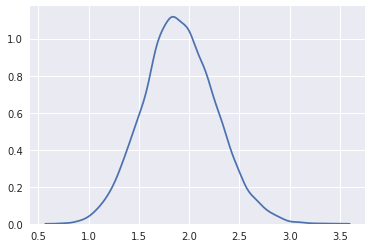

In [2]:
# 10 year PI control not considering first 200 years
import random
Nsample = plv[1200:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))
dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo[0:Nsample] = plv[1200:,0]
dummy_pi_scatter = np.zeros((N))

for niter in range(N):
    dummy = plv_pi_monte_carlo[random.sample(range(0, 8399), 120)]
    dummy_log[dummy<thres] = 0
    dummy_log[dummy>thres] = 1
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    dummy_pi_scatter[niter] = np.sum(dummy_log)
print(dummy_log_sum/N)
print(dummy_pi_scatter)
sns.kdeplot(dummy_pi_scatter/12)
#plt.savefig('plv_pi_pdf.eps', format='eps', dpi=1000)

38.9345
9.11


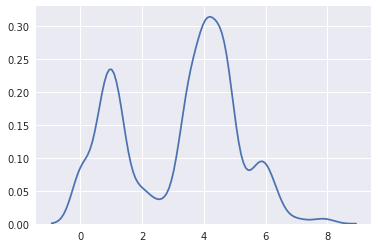

In [24]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[9600:10200,1]
niter = 0
dummy_hist_scatter_1650_1700 = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1650_1700[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
print(dummy_log_sum/N)
print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.kdeplot(dummy_hist_scatter_1650_1700[:]/12)
plt.savefig('plv_hist_pdf_1650_1700.eps', format='eps', dpi=1000)

In [7]:
# Since we are studying the impact of volcanic eruptions at max upto the decadal scale, we choose a 10 year
# period to sum over the Phase Locking Values for Volcanic eruptions in historical run. We have done this


33.9441
8.75
[-0.   -0.   -0.   -0.   -0.   -0.   -0.    0.8  -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.   -0.    0.41  0.66  0.84 -0.   -0.   -0.    0.51
 -0.   -0.   -0.    3.17 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  2.36 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.  ]


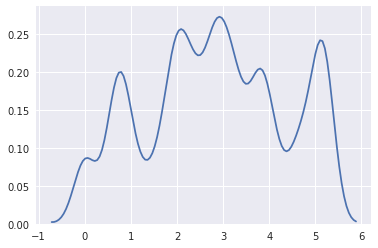

In [25]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[10200:10800,1]
niter = 0
dummy_hist_scatter_1700_1750 = np.zeros((N))

while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1700_1750[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
print(dummy_log_sum/N)
print(np.sum(volc_data[850:900]))
print(volc_data[850:900])
#1700-1750
sns.kdeplot(dummy_hist_scatter_1700_1750[:]/12)
plt.savefig('plv_hist_pdf_1700_1750.eps', format='eps', dpi=1000)

17.0999
14.29
[-0.   -0.   -0.    1.66 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
 -0.   -0.   -0.    1.58 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  0.43 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.    4.34 -0.   -0.   -0.
 -0.    0.53 -0.   -0.   -0.   -0.    5.75 -0.   -0.   -0.   -0.   -0.  ]


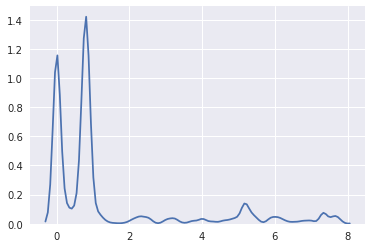

In [26]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[8400:9000,1]
niter = 0
dummy_hist_scatter_1550_1600 = np.zeros((N))


while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1550_1600[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
print(dummy_log_sum/N)
print(np.sum(volc_data[700:750]))
print(volc_data[700:750])
#1550-1600
sns.kdeplot(dummy_hist_scatter_1550_1600[:]/12)
plt.savefig('plv_hist_pdf_1550_1600.eps', format='eps', dpi=1000)

25.4456
[ 11.58  -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
  -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.48  -0.     1.73  -0.
  -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
  -0.    -0.    -0.     1.    -0.    -0.    -0.    11.84  -0.    -0.    -0.
  -0.     1.91  -0.    -0.    -0.    -0.  ]
5.12


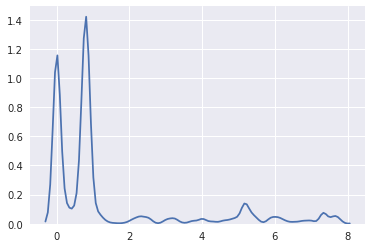

In [27]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[9000:9600,1]
niter = 0
dummy_hist_scatter_1600_1650 = np.zeros((N))

while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_1600_1650[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
print(dummy_log_sum/N)
print(volc_data[750:800])
print(np.sum(volc_data[750:800])-11.58-11.84)
#1600-1650
sns.kdeplot(dummy_hist_scatter_1550_1600[:]/12)
plt.savefig('plv_hist_pdf_1600_1650.eps', format='eps', dpi=1000)

In [28]:
# Filtered out volcanoes above 8 W/m2 to understand the role of frequency of volcanic eruptions

In [29]:
# Plot a scatter plot of VRF v/s PLV for moving 50 y subsamples 
# excluding volcanic events above 8 W/m2 
# Which will also give the dataset of PLVs during that period
# Two results coming out from this analysis
# 1. increase in PLV with number of volcanic events 
# 2. maximum increase in PLV by 15 % using monte carlo analysis as Maruan and Kurths had suggested 
# decadal impacts of volcanic eruptions

In [30]:
# Box and Whisker plots

In [31]:
import pandas as pd
pi = pd.DataFrame({ 'group' : np.repeat('PI',10000), 'value': dummy_pi_scatter })
hist_1550_1600 = pd.DataFrame({ 'group' : np.repeat('A',10000), 'value': dummy_hist_scatter_1550_1600 })
hist_1600_1650 = pd.DataFrame({ 'group' : np.repeat('B',10000), 'value': dummy_hist_scatter_1600_1650 })
hist_1650_1700 = pd.DataFrame({ 'group' : np.repeat('C',10000), 'value': dummy_hist_scatter_1650_1700 })
hist_1700_1750 = pd.DataFrame({ 'group' : np.repeat('D',10000), 'value': dummy_hist_scatter_1700_1750 })

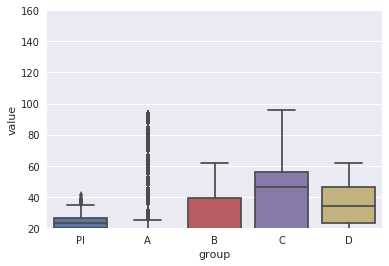

In [34]:
df=pi.append(hist_1550_1600).append(hist_1600_1650).append(hist_1650_1700).append(hist_1700_1750)
plt.ylim([20,160])
#sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(x='group', y='value', data=df)
plt.savefig('box_whisker.eps', format='eps', dpi=1000)

25.5634
9.11


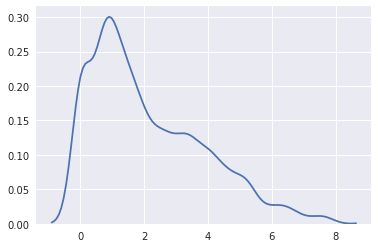

In [35]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo = plv[1200:,1]
niter = 0
dummy_hist_scatter_850_1850 = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(70, 11952), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]-60:rand_year[0]+60]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]-60:rand_year[0]+60]) < 0.1:
        continue
    dummy_hist_scatter_850_1850[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
print(dummy_log_sum/N)
print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.kdeplot(dummy_hist_scatter_850_1850[:]/12)
plt.savefig('plv_hist_pdf_850_1850.eps', format='eps', dpi=1000)

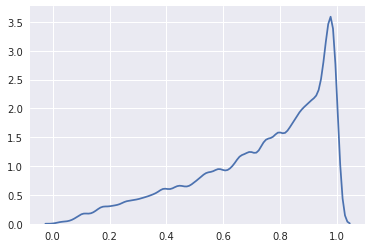

In [3]:
# 10 year PI control not considering first 200 years
import random
Nsample = plv[1200:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))
dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo[0:Nsample] = plv[1200:,0]
dummy_pi_scatter = np.zeros((N,120))

for niter in range(N):
    dummy = plv_pi_monte_carlo[random.sample(range(0, 8399), 120)]
    #dummy_log[dummy<thres] = 0
    #dummy_log[dummy>thres] = 1
    #dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    dummy_pi_scatter[niter] = dummy
#print(dummy_log_sum/N)
#print(dummy_pi_scatter)
sns.kdeplot(dummy_pi_scatter.flatten())

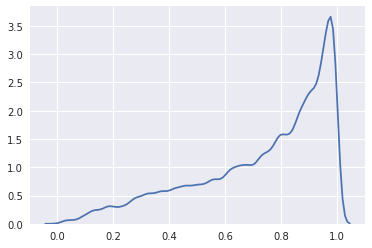

In [4]:
# 10 year PI control not considering first 200 years
import random
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))
dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo[0:Nsample] = plv[:,1]
dummy_hist_scatter = np.zeros((N,120))

for niter in range(N):
    dummy = plv_hist_monte_carlo[random.sample(range(0, 11800), 120)]
    #dummy_log[dummy<thres] = 0
    #dummy_log[dummy>thres] = 1
    #dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    dummy_hist_scatter[niter] = dummy
#print(dummy_log_sum/N)
#print(dummy_pi_scatter)
sns.kdeplot(dummy_hist_scatter.flatten())

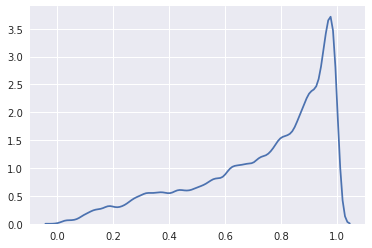

In [9]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo = plv[:,1]
niter = 0
dummy_hist_scatter = np.zeros((N,120))
while niter < N:
    rand_year = random.sample(range(70, 11830), 1)
    #print(rand_year[0])
    dummy = plv_hist_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
    dummy_hist_scatter[niter] = dummy_1
    niter = niter + 1
    #dummy_log[dummy_1<thres] = 0
    #dummy_log[dummy_1>thres] = 1
    #print(niter)
    #dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
#print(dummy_log_sum/N)
#print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.kdeplot(dummy_hist_scatter.flatten())
#plt.savefig('plv_hist_pdf_1650_1700.eps', format='eps', dpi=1000)

In [45]:
#volc_source = np.genfromtxt ('volc_source.csv', delimiter=",")
#volc_source_1 = np.zeros(1000)
#volc_source_1.shape
#volc_source[:,0]

In [44]:
#for i in range(volc_source.shape[0]):
#    print(volc_source[i,0]-850, volc_source[i,1])
#    volc_source_1[volc_source[i,0]-850] = volc_source[volc_source.shape[0]-i-1,1]

In [43]:
#volc_source_2 =L[::-1]

In [42]:
#volc_source_2 = volc_source_1[::-1]

In [41]:
#volc_source_2

In [40]:
#np.savetxt('volc_source_850_1849.csv', volc_source_2, delimiter=',')

In [10]:
import numpy as np 
x = np.zeros(5)


In [11]:
x.shape

(5,)

In [12]:
x[0:1]

array([ 0.])

In [13]:
x[0:5]

array([ 0.,  0.,  0.,  0.,  0.])

In [14]:
for i in range(5):
    print(i)

0
1
2
3
4


22.3978
9.11


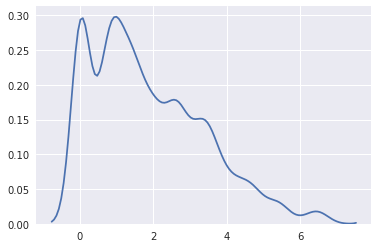

In [4]:
# 10 year historical only volcanic PLV volc thres = 10
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo = plv[:,1]
niter = 0
dummy_hist_scatter = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
    dummy_hist_scatter[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
print(dummy_log_sum/N)
print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.kdeplot(dummy_hist_scatter[:]/12)

22.1153
9.11


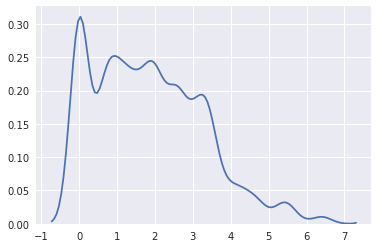

In [3]:
# 10 year historical only volcanic PLV volc thres = 10 for tropical eruptions
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo = plv[:,1]
niter = 0
dummy_hist_scatter = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
    if np.max(volc_source_data_mon[rand_year[0]:rand_year[0]+120]) > 1.1:
        continue
    dummy_hist_scatter[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
print(dummy_log_sum/N)
print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.kdeplot(dummy_hist_scatter[:]/12)

22.2057
9.11


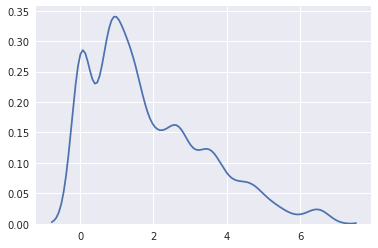

In [3]:
# 10 year historical only volcanic PLV volc thres = 10 for extra-tropical eruptions
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo = plv[:,1]
niter = 0
dummy_hist_scatter = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
    if np.max(volc_source_data_mon[rand_year[0]:rand_year[0]+120]) < 1.1:
        continue
    dummy_hist_scatter[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
print(dummy_log_sum/N)
print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.kdeplot(dummy_hist_scatter[:]/12)